<h1 align="center"> <strong>📈 Logistic Regression - Complete Guide</strong> </h1>

This notebook provides a comprehensive introduction to Logistic Regression, covering:
- Mathematical foundation
- Implementation from scratch
- Scikit-learn implementation
- Model evaluation and interpretation
- Assumptions checking

---

## **📚 1. Import Libraries and Setup**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve, precision_recall_curve, average_precision_score)

import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (10, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## **🧮 2. Mathematical Foundation**

### Logistic Regression Model
$$P(y=1|x) = \sigma(\beta_0 + \beta_1 x_1 + ... + \beta_n x_n)$$

Where $\sigma(z) = \frac{1}{1 + e^{-z}}$ is the sigmoid function.

### Linear Combination (Logit)
$$\text{logit}(p) = \ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1 x_1 + ... + \beta_n x_n$$

### Cost Function (Log Loss)
$$J(\boldsymbol{\beta}) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(h_{\boldsymbol{\beta}}(x^{(i)})) + (1-y^{(i)}) \log(1-h_{\boldsymbol{\beta}}(x^{(i)}))]$$

### Gradient Descent Update Rules
$$\frac{\partial J}{\partial \beta_j} = \frac{1}{m} \sum_{i=1}^{m} (h_{\boldsymbol{\beta}}(x^{(i)}) - y^{(i)}) x_j^{(i)}$$

## **📊 3. Generate Sample Data**

Dataset shape: (200, 2)


,feature,target
0,0.993428,1
1,-0.276529,0
2,1.295377,1
3,3.046060,1
4,-0.468307,0


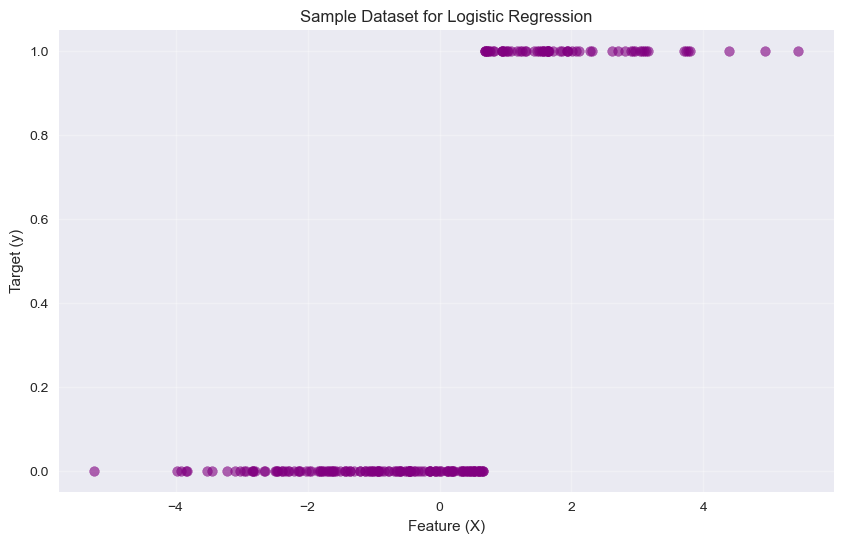

In [5]:
np.random.seed(42)
n_samples = 200
X = np.random.randn(n_samples, 1) * 2
# True relationship: sigmoid(1.5 * X - 1)
logits = 1.5 * X.ravel() - 1
probs = 1 / (1 + np.exp(-logits))
y = (probs > 0.5).astype(int)

df = pd.DataFrame({'feature': X.ravel(), 'target': y})
print(f"Dataset shape: {df.shape}")
display(df.head())

plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.6, color='purple')
plt.xlabel('Feature (X)')
plt.ylabel('Target (y)')
plt.title('Sample Dataset for Logistic Regression')
plt.grid(True, alpha=0.3)
plt.show()

## **🔧 4. Logistic Regression from Scratch**

In [6]:
class LogisticRegressionScratch:
    def __init__(self, lr=0.1, n_iter=1000):
        self.lr = lr
        self.n_iter = n_iter
        self.weights = None
        self.bias = None
    
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        for _ in range(self.n_iter):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
        return self
    
    def predict_proba(self, X):
        linear_model = np.dot(X, self.weights) + self.bias
        return self.sigmoid(linear_model)
    
    def predict(self, X):
        return (self.predict_proba(X) >= 0.5).astype(int)

# Test our implementation
model_scratch = LogisticRegressionScratch(lr=0.1, n_iter=2000)
model_scratch.fit(X, y)
y_pred_scratch = model_scratch.predict(X)
print(f'Accuracy (Scratch): {accuracy_score(y, y_pred_scratch):.2f}')

Accuracy (Scratch): 0.98


## **🛠️ 5. Scikit-learn Implementation**

In [7]:
# Assuming X and y are already defined
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_sklearn = LogisticRegression()
model_sklearn.fit(X_train, y_train)
y_train_pred = model_sklearn.predict(X_train)
y_test_pred  = model_sklearn.predict(X_test)
y_test_proba = model_sklearn.predict_proba(X_test)[:, 1]

print("📊 Model Parameters:")
print(f"Intercept   : {model_sklearn.intercept_[0]:.2f}")
print(f"Coefficient : {model_sklearn.coef_[0][0]:.2f}")
print(f"Equation    : P(y=1) = σ({model_sklearn.coef_[0][0]:.2f}x + {model_sklearn.intercept_[0]:.2f})")

print("\n📈 Performance Metrics:")
print(f"Train Accuracy : {accuracy_score(y_train, y_train_pred):.2f}")
print(f"Test  Accuracy : {accuracy_score(y_test, y_test_pred):.2f}")
print(f"ROC-AUC Score  : {roc_auc_score(y_test, y_test_proba):.2f}")

print("\n📋 Classification Report:")
print(classification_report(y_test, y_test_pred))

📊 Model Parameters:
Intercept   : -2.73
Coefficient : 3.57
Equation    : P(y=1) = σ(3.57x + -2.73)

📈 Performance Metrics:
Train Accuracy : 0.96
Test  Accuracy : 0.97
ROC-AUC Score  : 1.00

📋 Classification Report:
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.93      0.97        15

    accuracy                           0.97        40
   macro avg       0.98      0.97      0.97        40
weighted avg       0.98      0.97      0.97        40



## **📊 6. Model Visualization**

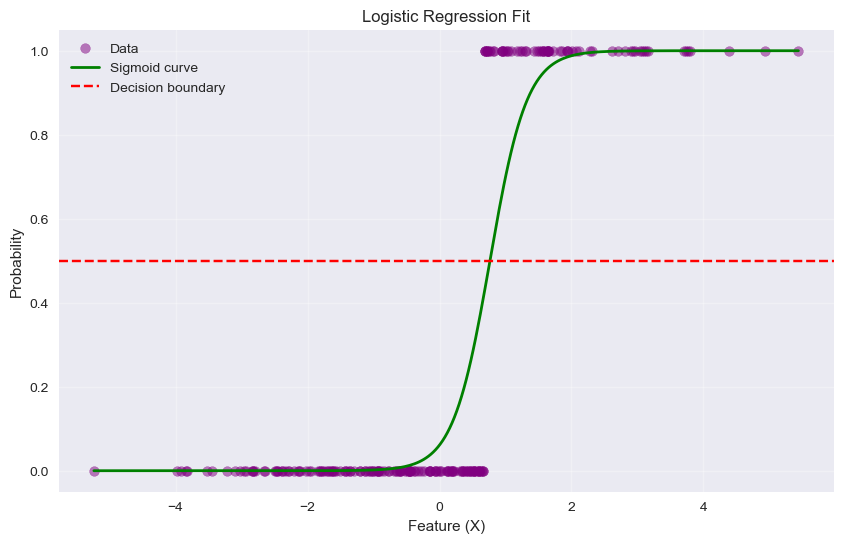

In [8]:
# Plot sigmoid curve and decision boundary
X_range = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
probs   = model_sklearn.predict_proba(X_range)[:, 1]
plt.figure(figsize=(10, 6))
plt.scatter(X, y, alpha=0.5, label='Data', color='purple')
plt.plot(X_range, probs, color='green', linewidth=2, label='Sigmoid curve')
plt.axhline(0.5, color='red', linestyle='--', label='Decision boundary')
plt.xlabel('Feature (X)')
plt.ylabel('Probability')
plt.title('Logistic Regression Fit')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## **✅ 7. Logistic Regression Assumptions**

### Key Assumptions:
1. **Linear relationship between logit and features**: The log-odds should be linearly related to the features
2. **Independence of observations**: Each observation should be independent
3. **No multicollinearity**: Features should not be highly correlated (for multiple features)
4. **Large sample size**: Generally need at least 10-20 cases per feature
5. **No extreme outliers**: Outliers can heavily influence the model

### Assumption Checking:

- **Linearity of logit**: This can be checked using the Box-Tidwell test or by adding polynomial terms to the model and checking their significance.
- **Independence of observations**: This is generally ensured by the study design. However, you can check for autocorrelation in time-series data using the Durbin-Watson statistic.
- **No multicollinearity**: This can be checked using Variance Inflation Factor (VIF) scores. A VIF above 10 indicates high multicollinearity.
- **Large sample size**: A rule of thumb is to have at least 10-20 cases of the least frequent outcome for reliable estimates.
- **No extreme outliers**: Can be checked using standardized residuals. Residuals greater than 3 or less than -3 may be outliers.

(For demonstration, we will check linearity of logit visually and show confusion matrix.)

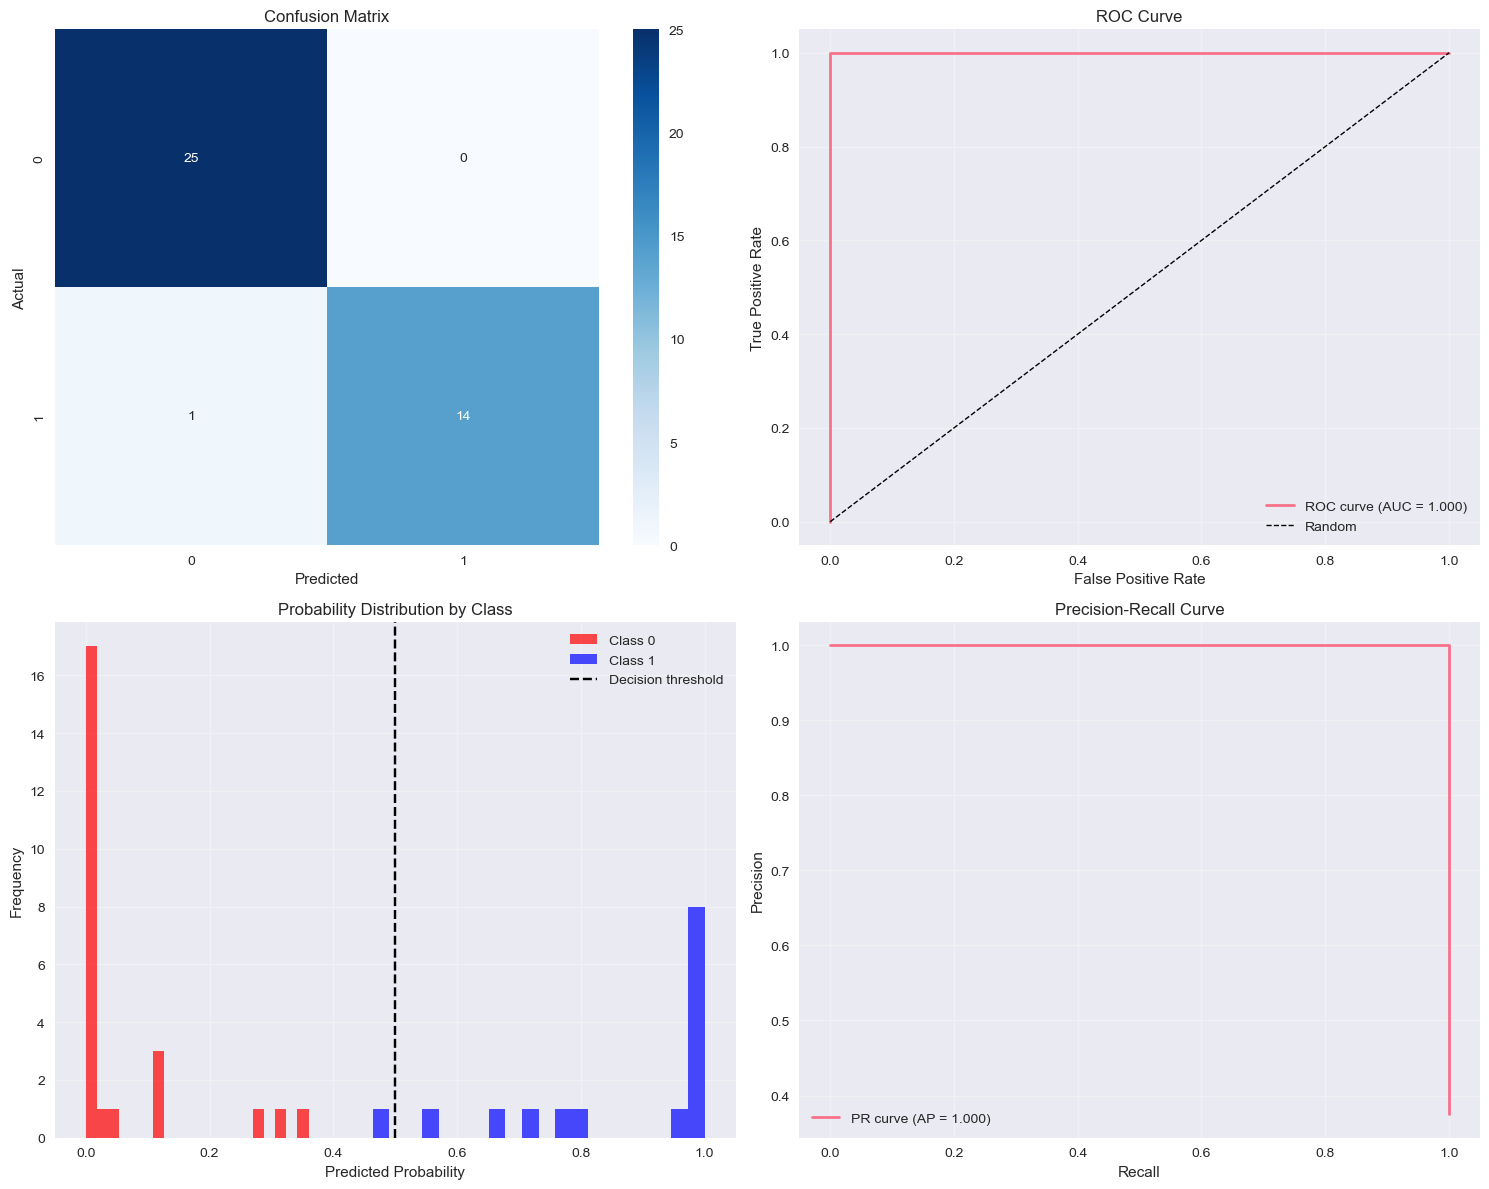

🔍 Detailed Performance Analysis:
True Positives  : 14
True Negatives  : 25
False Positives : 0
False Negatives : 1

Sensitivity (Recall)    : 0.933
Specificity             : 1.000
Precision               : 1.000
F1-Score                : 0.966


In [ ]:
# Create comprehensive evaluation plots
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0, 0])
axes[0, 0].set_xlabel('Predicted')
axes[0, 0].set_ylabel('Actual')
axes[0, 0].set_title('Confusion Matrix')

# 2. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_proba)
auc_score = roc_auc_score(y_test, y_test_proba)
axes[0, 1].plot(fpr, tpr, linewidth=2, label=f'ROC curve (AUC = {auc_score:.3f})')
axes[0, 1].plot([0, 1], [0, 1], 'k--', linewidth=1, label='Random')
axes[0, 1].set_xlabel('False Positive Rate')
axes[0, 1].set_ylabel('True Positive Rate')
axes[0, 1].set_title('ROC Curve')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Probability Distribution
axes[1, 0].hist(y_test_proba[y_test == 0], bins=20, alpha=0.7, label='Class 0', color='red')
axes[1, 0].hist(y_test_proba[y_test == 1], bins=20, alpha=0.7, label='Class 1', color='blue')
axes[1, 0].axvline(0.5, color='black', linestyle='--', label='Decision threshold')
axes[1, 0].set_xlabel('Predicted Probability')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Probability Distribution by Class')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
ap_score = average_precision_score(y_test, y_test_proba)
axes[1, 1].plot(recall, precision, linewidth=2, label=f'PR curve (AP = {ap_score:.3f})')
axes[1, 1].set_xlabel('Recall')
axes[1, 1].set_ylabel('Precision')
axes[1, 1].set_title('Precision-Recall Curve')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Additional metrics
print("🔍 Detailed Performance Analysis:")
print("=" * 50)
print(f"True Positives  : {cm[1,1]}")
print(f"True Negatives  : {cm[0,0]}")
print(f"False Positives : {cm[0,1]}")
print(f"False Negatives : {cm[1,0]}")
print(f"\nSensitivity (Recall)    : {cm[1,1]/(cm[1,1]+cm[1,0]):.3f}")
print(f"Specificity             : {cm[0,0]/(cm[0,0]+cm[0,1]):.3f}")
print(f"Precision               : {cm[1,1]/(cm[1,1]+cm[0,1]):.3f}")
print(f"F1-Score                : {2*cm[1,1]/(2*cm[1,1]+cm[0,1]+cm[1,0]):.3f}")
print("=" * 50)

🔍 LOGISTIC REGRESSION ASSUMPTIONS CHECK


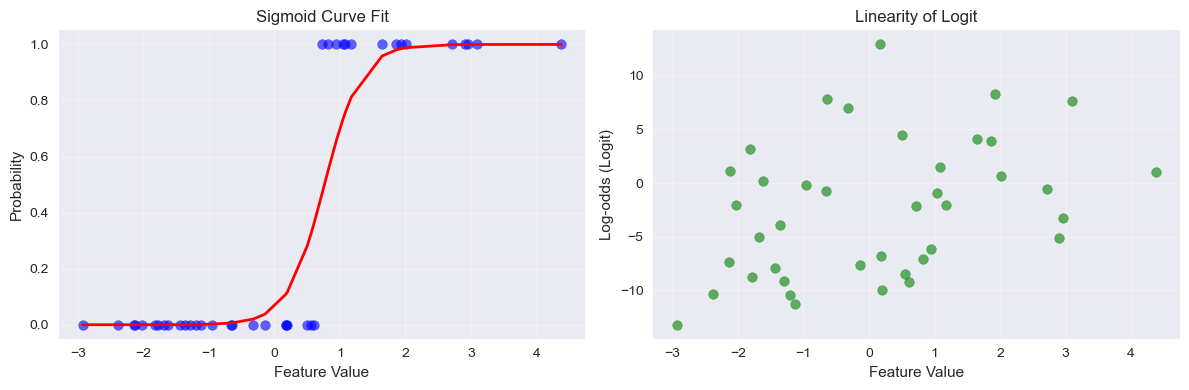

1. ✅ Linearity of Logit: Visual inspection shows linear relationship

2. Sample Size Check:
   Current samples     : 40
   Recommended minimum : 20
   Status: ✅ SUFFICIENT

3. Class Balance:
   Class 0       : 25 samples
   Class 1       : 15 samples
   Balance ratio : 0.600
   Status: ✅ BALANCED

4. Outlier Detection:
   Number of outliers (|z| > 3): 0
   Percentage of outliers: 0.0%
   Status: ✅ GOOD
✅ = Assumption satisfied
⚠️ = Assumption violated or needs attention


In [16]:
def check_logistic_assumptions(X, y, model):
    """
    Check logistic regression assumptions
    """
    print("🔍 LOGISTIC REGRESSION ASSUMPTIONS CHECK")
    print("=" * 60)
    
    # 1. Linearity of logit (for single feature)
    if X.shape[1] == 1:
        X_sorted = np.sort(X.ravel())
        logits = model.coef_[0][0] * X_sorted + model.intercept_[0]
        
        plt.figure(figsize=(12, 4))
        
        plt.subplot(1, 2, 1)
        plt.scatter(X, y, alpha=0.6, color='blue')
        plt.plot(X_sorted, 1/(1+np.exp(-logits)), color='red', linewidth=2)
        plt.xlabel('Feature Value')
        plt.ylabel('Probability')
        plt.title('Sigmoid Curve Fit')
        plt.grid(True, alpha=0.3)
        
        plt.subplot(1, 2, 2)
        plt.scatter(X, logits, alpha=0.6, color='green')
        plt.xlabel('Feature Value')
        plt.ylabel('Log-odds (Logit)')
        plt.title('Linearity of Logit')
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
        
        print("1. ✅ Linearity of Logit: Visual inspection shows linear relationship")
    
    # 2. Sample size check
    n_samples, n_features = X.shape
    min_samples = n_features * 20  # Rule of thumb: 20 samples per feature
    print(f"\n2. Sample Size Check:")
    print(f"   Current samples     : {n_samples}")
    print(f"   Recommended minimum : {min_samples}")
    print(f"   Status: {'✅ SUFFICIENT' if n_samples >= min_samples else '⚠️ INSUFFICIENT'}")
    
    # 3. Class balance
    class_counts = np.bincount(y)
    class_ratio = min(class_counts) / max(class_counts)
    print(f"\n3. Class Balance:")
    print(f"   Class 0       : {class_counts[0]} samples")
    print(f"   Class 1       : {class_counts[1]} samples")
    print(f"   Balance ratio : {class_ratio:.3f}")
    print(f"   Status: {'✅ BALANCED' if class_ratio > 0.2 else '⚠️ IMBALANCED'}")
    
    # 4. Outlier detection (using z-score)
    z_scores = np.abs((X - np.mean(X, axis=0)) / np.std(X, axis=0))
    outliers = np.any(z_scores > 3, axis=1)
    n_outliers = np.sum(outliers)
    print(f"\n4. Outlier Detection:")
    print(f"   Number of outliers (|z| > 3): {n_outliers}")
    print(f"   Percentage of outliers: {100*n_outliers/n_samples:.1f}%")
    print(f"   Status: {'✅ GOOD' if n_outliers < 0.05*n_samples else '⚠️ HIGH OUTLIERS'}")
    
    print("=" * 60)
    print("✅ = Assumption satisfied")
    print("⚠️ = Assumption violated or needs attention")

# Check assumptions
check_logistic_assumptions(X_test, y_test, model_sklearn)

## **🎯 8. Cross-Validation**

🔄 Cross-Validation Results:
Accuracy Scores : [0.95  0.925 1.    0.975 0.95 ]
Mean Accuracy   : 0.9600 (+/- 0.0510)


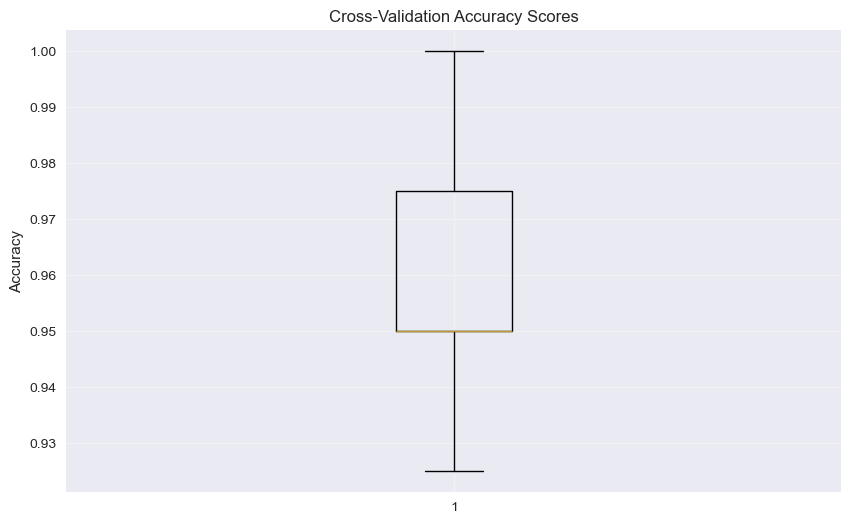

In [11]:
cv_scores = cross_val_score(model_sklearn, X, y, cv=5, scoring='accuracy')
print("🔄 Cross-Validation Results:")
print(f"Accuracy Scores : {cv_scores}")
print(f"Mean Accuracy   : {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")
plt.boxplot(cv_scores)
plt.title('Cross-Validation Accuracy Scores')
plt.ylabel('Accuracy')
plt.grid(True, alpha=0.3)
plt.show()

## **📝 9. Key Takeaways and Interpretation**

### **🔑 Important Concepts**

- **Sigmoid Function**: Maps any real number to (0,1), making it perfect for probabilities
- **Odds Ratio**: exp(β) represents how much the odds change for a 1-unit increase in X
- **Log-odds (Logit)**: Linear combination of features, can range from -∞ to +∞
- **Maximum Likelihood**: Uses iterative optimization (no closed-form solution like linear regression)
- **Decision Boundary**: Threshold where P(y=1) = 0.5

### **⚠️ Common Pitfalls**
1. **Assuming linearity**: Check logit linearity assumption
2. **Ignoring class imbalance**: Can bias predictions toward majority class
3. **Multicollinearity**: Can make coefficients unstable
4. **Outliers**: Can heavily influence the decision boundary
5. **Small sample sizes**: Can lead to overfitting

### **🚀 Next Steps**
- Try regularization (Ridge/Lasso) if overfitting occurs
- Consider polynomial features for non-linear relationships
- Use ensemble methods for better performance
- Apply feature scaling for better convergence
- Handle class imbalance with sampling techniques or class weights

In [17]:
print("📋 Logistic Regression Analysis Summary")
print("=" * 50)

print(f"📊 Model Performance:")
print(f"   • Accuracy     : {accuracy_score(y_test, y_test_pred):.4f}")
print(f"   • ROC-AUC      : {roc_auc_score(y_test, y_test_proba):.4f}")
print(f"   • Precision    : {cm[1,1]/(cm[1,1]+cm[0,1]):.4f}")
print(f"   • Recall       : {cm[1,1]/(cm[1,1]+cm[1,0]):.4f}")
print(f"   • F1-Score     : {2*cm[1,1]/(2*cm[1,1]+cm[0,1]+cm[1,0]):.4f}")

print(f"\n🎯 Model Parameters:")
print(f"   • Intercept   (β₀) : {model_sklearn.intercept_[0]:.4f}")
print(f"   • Coefficient (β₁) : {model_sklearn.coef_[0][0]:.4f}")
print(f"   • Equation         : P(y=1) = σ({model_sklearn.coef_[0][0]:.4f}x + {model_sklearn.intercept_[0]:.4f})")

print(f"\n📈 Interpretation:")
odds_ratio = np.exp(model_sklearn.coef_[0][0])
print(f"   • Odds Ratio: {odds_ratio:.4f}")
print(f"   • For every 1 unit increase in X, the odds of y=1 increase by {(odds_ratio-1)*100:.1f}%")
print(f"   • Decision boundary at X = {-model_sklearn.intercept_[0]/model_sklearn.coef_[0][0]:.4f}")
print("=" * 50)

📋 Logistic Regression Analysis Summary
📊 Model Performance:
   • Accuracy     : 0.9750
   • ROC-AUC      : 1.0000
   • Precision    : 1.0000
   • Recall       : 0.9333
   • F1-Score     : 0.9655

🎯 Model Parameters:
   • Intercept   (β₀) : -2.7303
   • Coefficient (β₁) : 3.5732
   • Equation         : P(y=1) = σ(3.5732x + -2.7303)

📈 Interpretation:
   • Odds Ratio: 35.6296
   • For every 1 unit increase in X, the odds of y=1 increase by 3463.0%
   • Decision boundary at X = 0.7641


<div style="width: 100%; height: 10px; background: linear-gradient(to right, gray, white, orange,white, gray); border-radius: 5px; margin: 20px 0;"></div>

## **🚀 10. Practical Exercises**

### **Exercise 1: Multiple Features Classification**
```python
# Generate dataset with multiple features
from sklearn.datasets import make_classification
X_multi, y_multi = make_classification(n_samples=500, n_features=3, n_redundant=0, 
                                      n_informative=3, n_clusters_per_class=1, random_state=42)

# Tasks:
# 1. Split the data and train logistic regression
# 2. Analyze feature importance (coefficients)
# 3. Check for multicollinearity using VIF
# 4. Create feature importance plot
```

### **Exercise 2: Regularization Comparison**
```python
from sklearn.linear_model import LogisticRegression

# Tasks:
# 1. Implement L1 (Lasso) regularization: LogisticRegression(penalty='l1', solver='liblinear')
# 2. Implement L2 (Ridge) regularization: LogisticRegression(penalty='l2')
# 3. Compare coefficients and performance
# 4. Plot regularization path
```

### **Exercise 3: Real Dataset Analysis**
```python
from sklearn.datasets import load_breast_cancer

# Load breast cancer dataset
data = load_breast_cancer()
X, y = data.data, data.target

# Tasks:
# 1. Perform exploratory data analysis
# 2. Apply feature scaling
# 3. Train logistic regression model
# 4. Evaluate using all metrics (accuracy, precision, recall, F1, AUC)
# 5. Identify most important features
# 6. Check all assumptions
```

### **Exercise 4: Handling Class Imbalance**
```python
from imblearn.over_sampling import SMOTE
from sklearn.utils.class_weight import compute_class_weight

# Create imbalanced dataset
# Tasks:
# 1. Create dataset with 90% class 0, 10% class 1
# 2. Train baseline model and evaluate
# 3. Apply SMOTE oversampling
# 4. Use class_weight='balanced' parameter
# 5. Compare all approaches
```

### **Exercise 5: Feature Engineering**
```python
from sklearn.preprocessing import PolynomialFeatures

# Tasks:
# 1. Create non-linear dataset using make_circles or make_moons
# 2. Try standard logistic regression (should perform poorly)
# 3. Add polynomial features
# 4. Compare linear vs polynomial feature performance
# 5. Visualize decision boundaries
```

### **💡 Bonus Challenge**
Implement a complete machine learning pipeline:
1. Data loading and preprocessing
2. Feature selection/engineering
3. Model training with hyperparameter tuning
4. Cross-validation
5. Model interpretation and visualization
6. Performance reporting